# California Housing Price Prediction
## A Comparative Analysis of Machine Learning Regression Algorithms

**Author:** [Your Name]  
**Date:** December 2024

---

## 1. Introduction

### 1.1 Problem Statement

This project addresses the challenge of predicting median housing prices in California districts based on various demographic and geographic features. Accurate housing price prediction is crucial for real estate investment decisions, urban planning, and policy-making.

### 1.2 Motivation and Challenges

Housing affordability is a critical issue affecting millions of people. Understanding what factors drive housing prices can help:
- Homebuyers make informed decisions
- Investors identify undervalued properties
- Policymakers develop effective housing strategies

The key challenges include:
- Non-linear relationships between features and prices
- Geographic clustering effects
- Handling varying scales of features

### 1.3 Approach Summary

We employ multiple regression algorithms to predict housing prices:
1. **Linear Regression** - A baseline parametric model to establish performance benchmarks
2. **Random Forest Regressor** - An ensemble method that captures non-linear relationships
3. **Gradient Boosting Regressor** - A powerful boosting algorithm for improved accuracy

This multi-model approach allows us to compare different algorithmic paradigms and understand which best captures the underlying patterns in housing data.

## 2. Data

### 2.1 Import Libraries

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score
)

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.5
Pandas version: 2.3.3


### 2.2 Data Introduction

The California Housing dataset is derived from the 1990 U.S. Census. It contains information about housing in California districts, aggregated at the block group level. This dataset is widely used in machine learning education and research (Pace & Barry, 1997).

**Dataset Characteristics:**
- **Source:** StatLib repository, originally from the 1990 U.S. Census
- **Samples:** 20,640 districts
- **Features:** 8 numeric attributes
- **Target:** Median house value (in $100,000s)

In [2]:
# Load the California Housing dataset
california = fetch_california_housing()

# Create DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

print("California Housing Dataset Loaded Successfully!")
print("="*60)
print(f"Number of samples: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Target variable: MedHouseVal (Median House Value in $100,000s)")
print("\nFeature Descriptions:")
print("-"*60)
feature_descriptions = {
    'MedInc': 'Median income in block group',
    'HouseAge': 'Median house age in block group',
    'AveRooms': 'Average number of rooms per household',
    'AveBedrms': 'Average number of bedrooms per household',
    'Population': 'Block group population',
    'AveOccup': 'Average number of household members',
    'Latitude': 'Block group latitude',
    'Longitude': 'Block group longitude'
}
for feat, desc in feature_descriptions.items():
    print(f"  {feat:12s}: {desc}")

California Housing Dataset Loaded Successfully!
Number of samples: 20,640
Number of features: 8
Target variable: MedHouseVal (Median House Value in $100,000s)

Feature Descriptions:
------------------------------------------------------------
  MedInc      : Median income in block group
  HouseAge    : Median house age in block group
  AveRooms    : Average number of rooms per household
  AveBedrms   : Average number of bedrooms per household
  Population  : Block group population
  AveOccup    : Average number of household members
  Latitude    : Block group latitude
  Longitude   : Block group longitude


In [3]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [4]:
# Dataset info
print("Dataset Information:")
print("="*60)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 2.3 Basic Visual Analysis

In [5]:
# Statistical summary
print("Statistical Summary:")
print("="*60)
summary_stats = df.describe().T
summary_stats['range'] = summary_stats['max'] - summary_stats['min']
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
summary_stats

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max,range,IQR
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100,14.500200,2.179850
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000,51.000000,19.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091,141.062937,1.611665
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667,33.733333,0.093447
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000,35679.000000,938.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333,1242.641026,0.852520
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000,9.410000,3.780000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000,10.040000,3.790000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010,4.850020,1.451250


In [6]:
# Check for missing values
print("Missing Values Check:")
print("="*60)
missing = df.isnull().sum()
print(f"Total missing values: {missing.sum()}")
if missing.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing values per column:")
    print(missing[missing > 0])

Missing Values Check:
Total missing values: 0
No missing values found in the dataset.


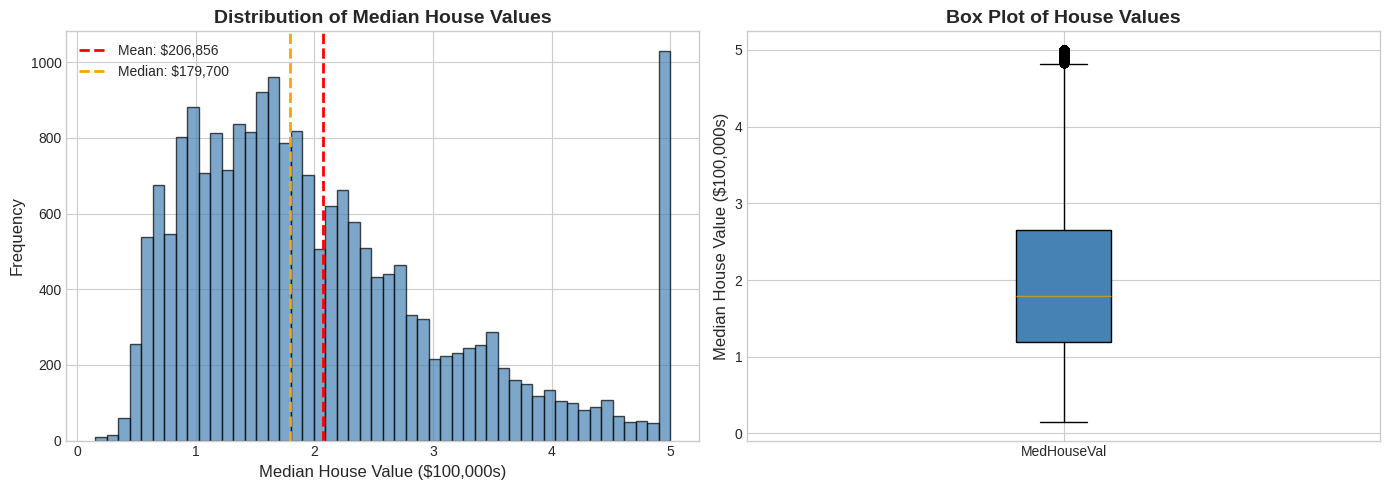


Target Variable Statistics:
  Mean: $206,855.82
  Median: $179,700.00
  Std Dev: $115,395.62
  Min: $14,999.00
  Max: $500,001.00

Note: Values are capped at $500,000 (shown as 5.0 in the data)


In [7]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['MedHouseVal'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['MedHouseVal'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["MedHouseVal"].mean()*100000:,.0f}')
axes[0].axvline(df['MedHouseVal'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: ${df["MedHouseVal"].median()*100000:,.0f}')
axes[0].set_xlabel('Median House Value ($100,000s)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Median House Values', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)

# Box plot
bp = axes[1].boxplot(df['MedHouseVal'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('steelblue')
axes[1].set_ylabel('Median House Value ($100,000s)', fontsize=12)
axes[1].set_title('Box Plot of House Values', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['MedHouseVal'])

plt.tight_layout()
plt.savefig('figures/01_target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nTarget Variable Statistics:")
print(f"  Mean: ${df['MedHouseVal'].mean()*100000:,.2f}")
print(f"  Median: ${df['MedHouseVal'].median()*100000:,.2f}")
print(f"  Std Dev: ${df['MedHouseVal'].std()*100000:,.2f}")
print(f"  Min: ${df['MedHouseVal'].min()*100000:,.2f}")
print(f"  Max: ${df['MedHouseVal'].max()*100000:,.2f}")
print(f"\nNote: Values are capped at $500,000 (shown as 5.0 in the data)")

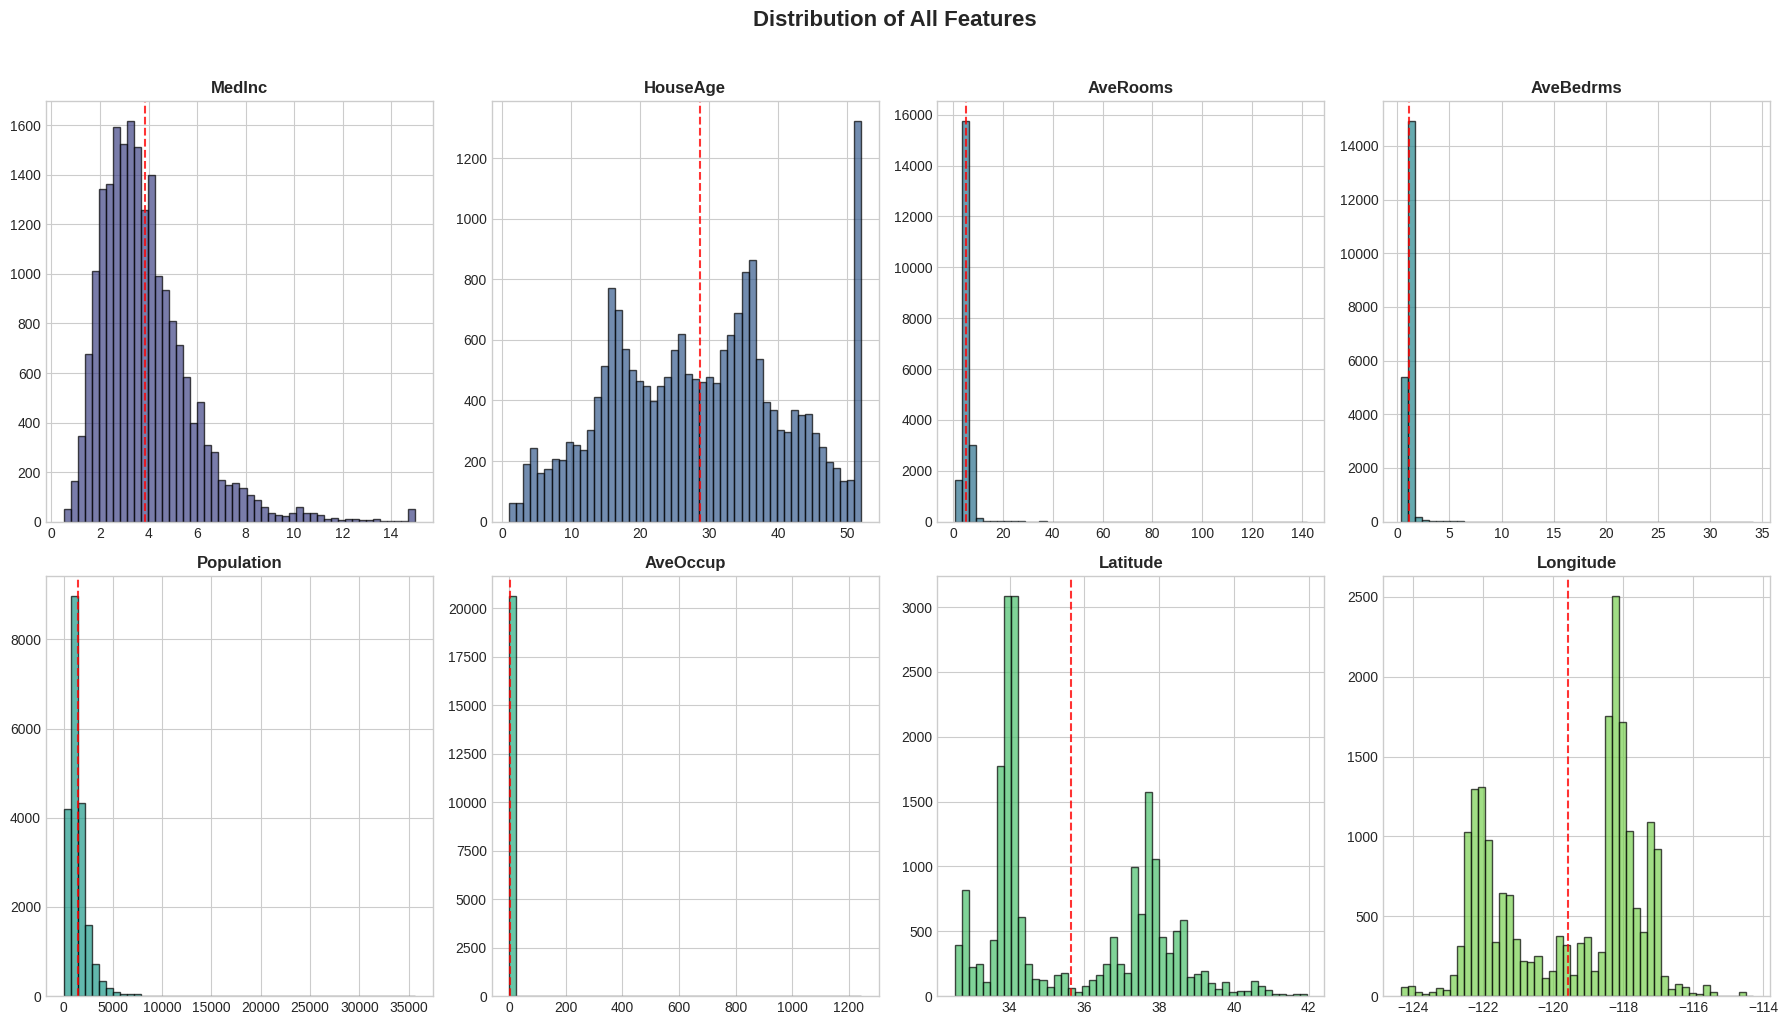

In [8]:
# Feature distributions
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

features = california.feature_names
colors = plt.cm.viridis(np.linspace(0.2, 0.8, 8))

for i, (feature, color) in enumerate(zip(features, colors)):
    axes[i].hist(df[feature], bins=50, color=color, edgecolor='black', alpha=0.7)
    axes[i].set_title(feature, fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].axvline(df[feature].mean(), color='red', linestyle='--', alpha=0.8)

plt.suptitle('Distribution of All Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('figures/02_feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

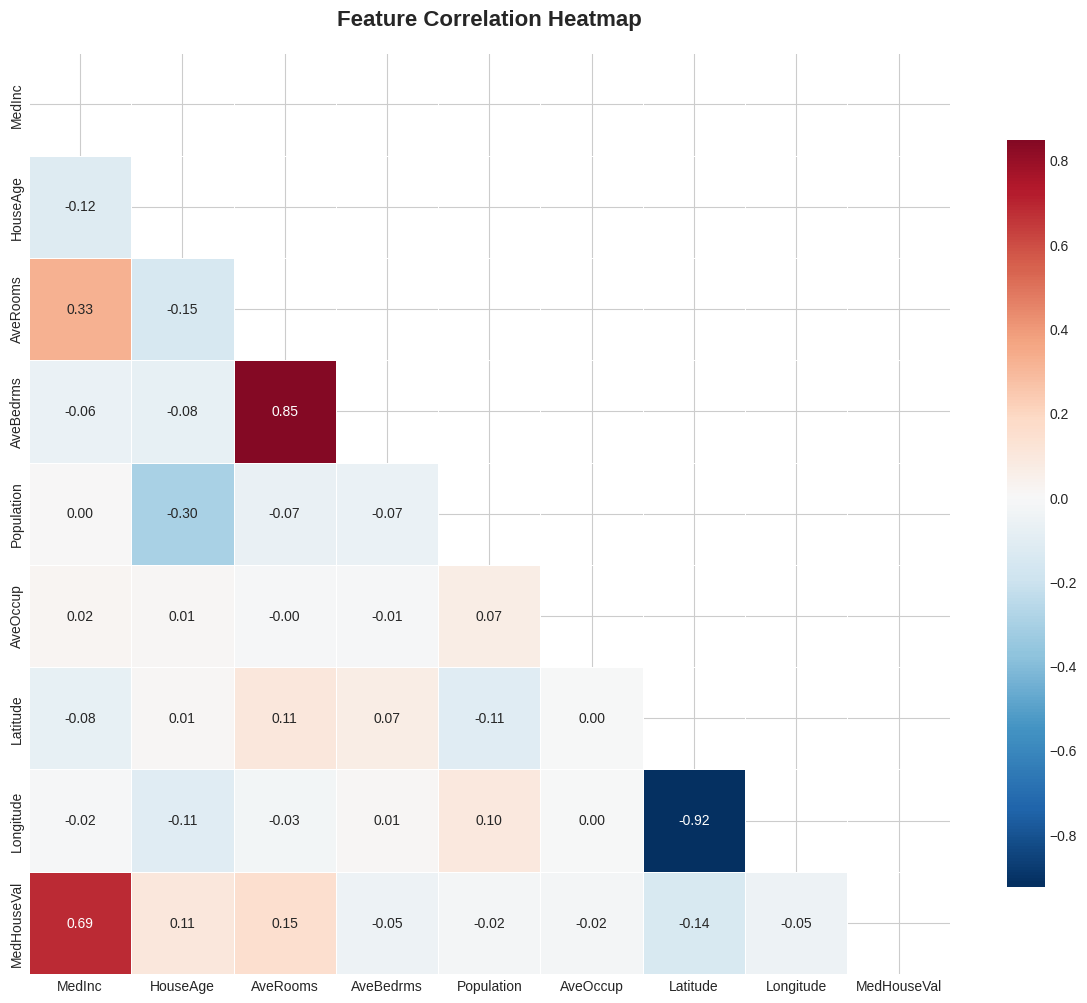


Correlations with Target (MedHouseVal):
  MedInc      : +0.6881
  AveRooms    : +0.1519
  Latitude    : -0.1442
  HouseAge    : +0.1056
  AveBedrms   : -0.0467
  Longitude   : -0.0460
  Population  : -0.0246
  AveOccup    : -0.0237


In [9]:
# Correlation analysis
fig, ax = plt.subplots(figsize=(12, 10))

corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5, 
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 10})

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('figures/03_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Print correlations with target
print("\nCorrelations with Target (MedHouseVal):")
print("="*50)
target_corr = corr_matrix['MedHouseVal'].drop('MedHouseVal').sort_values(key=abs, ascending=False)
for feature, corr in target_corr.items():
    print(f"  {feature:12s}: {corr:+.4f}")

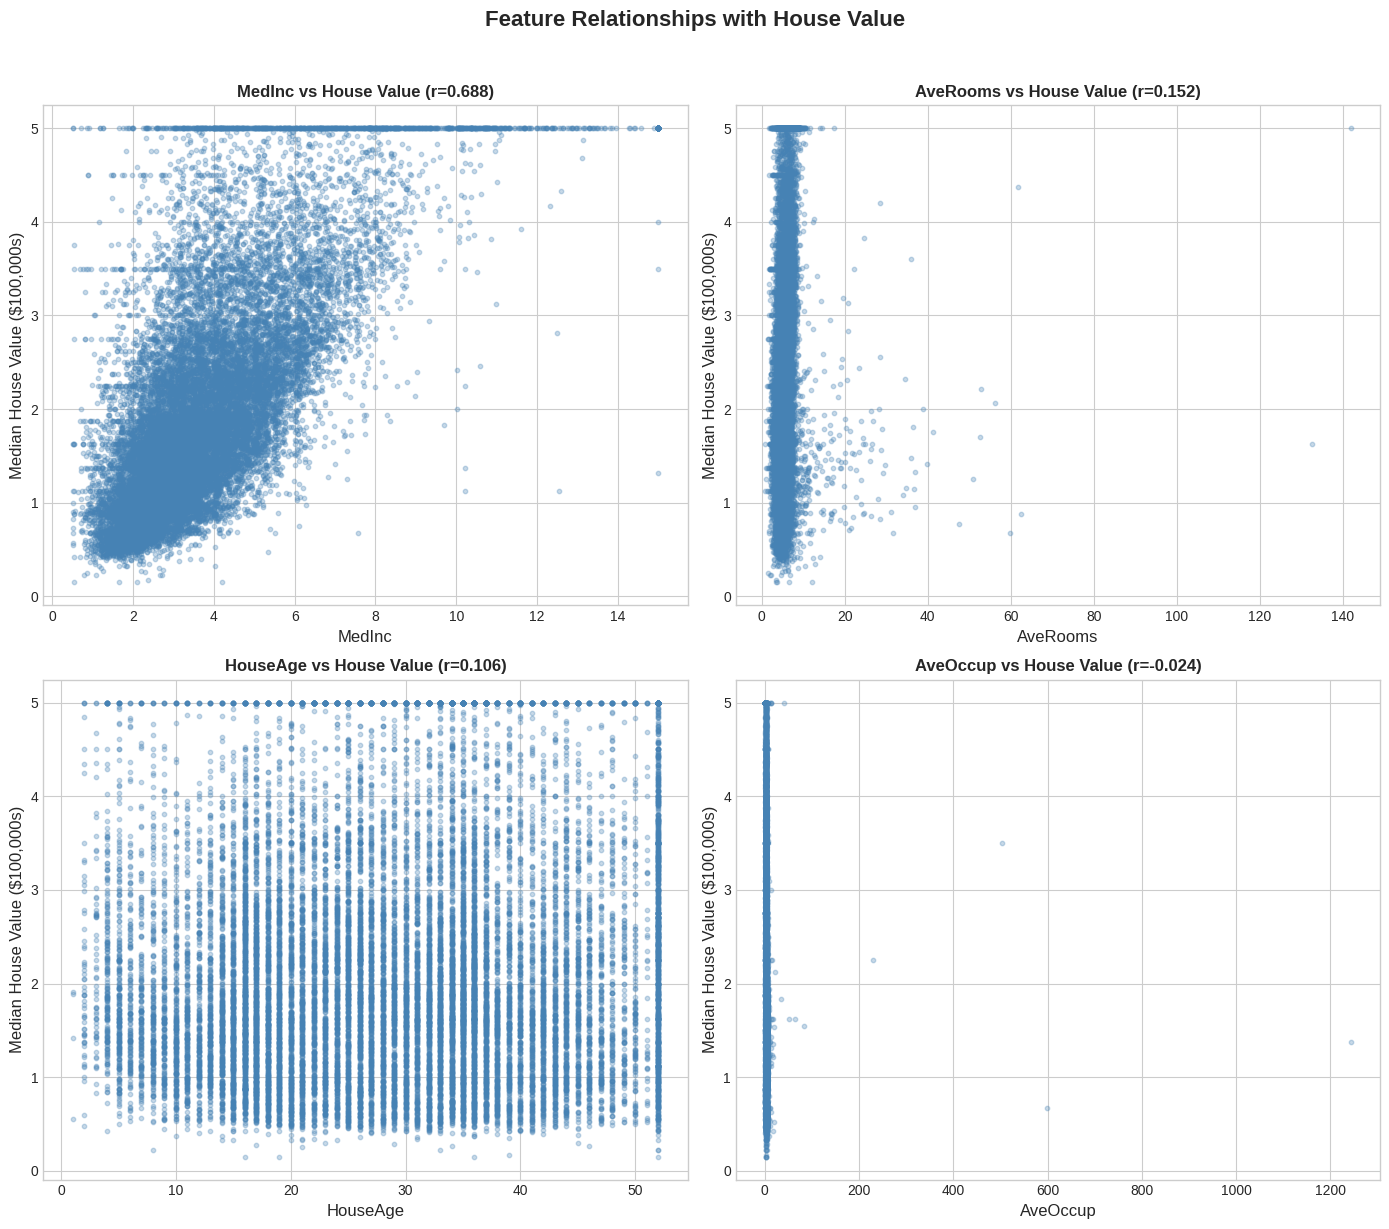

In [10]:
# Scatter plots of top correlated features vs target
top_features = ['MedInc', 'AveRooms', 'HouseAge', 'AveOccup']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    axes[i].scatter(df[feature], df['MedHouseVal'], alpha=0.3, s=10, c='steelblue')
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Median House Value ($100,000s)', fontsize=12)
    corr = df[feature].corr(df['MedHouseVal'])
    axes[i].set_title(f'{feature} vs House Value (r={corr:.3f})', fontsize=12, fontweight='bold')

plt.suptitle('Feature Relationships with House Value', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('figures/04_scatter_plots.png', dpi=150, bbox_inches='tight')
plt.show()

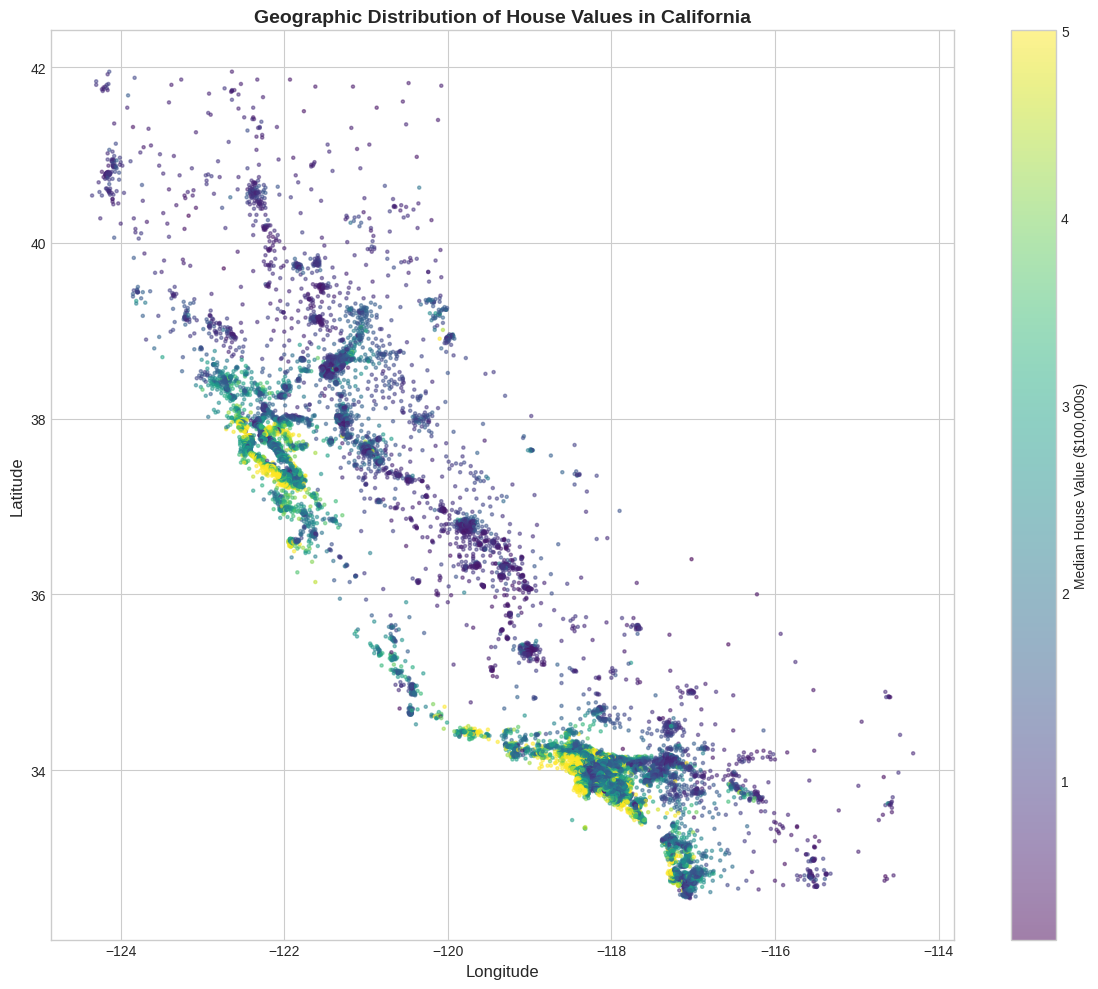


Observations:
- Higher house values clustered along the coast (Bay Area, Los Angeles)
- Interior regions generally have lower house values
- Clear geographic clustering of property values


In [11]:
# Geographic visualization
fig, ax = plt.subplots(figsize=(12, 10))

scatter = ax.scatter(df['Longitude'], df['Latitude'], 
                     c=df['MedHouseVal'], cmap='viridis', 
                     alpha=0.5, s=5)

plt.colorbar(scatter, label='Median House Value ($100,000s)')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title('Geographic Distribution of House Values in California', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/05_geographic_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nObservations:")
print("- Higher house values clustered along the coast (Bay Area, Los Angeles)")
print("- Interior regions generally have lower house values")
print("- Clear geographic clustering of property values")

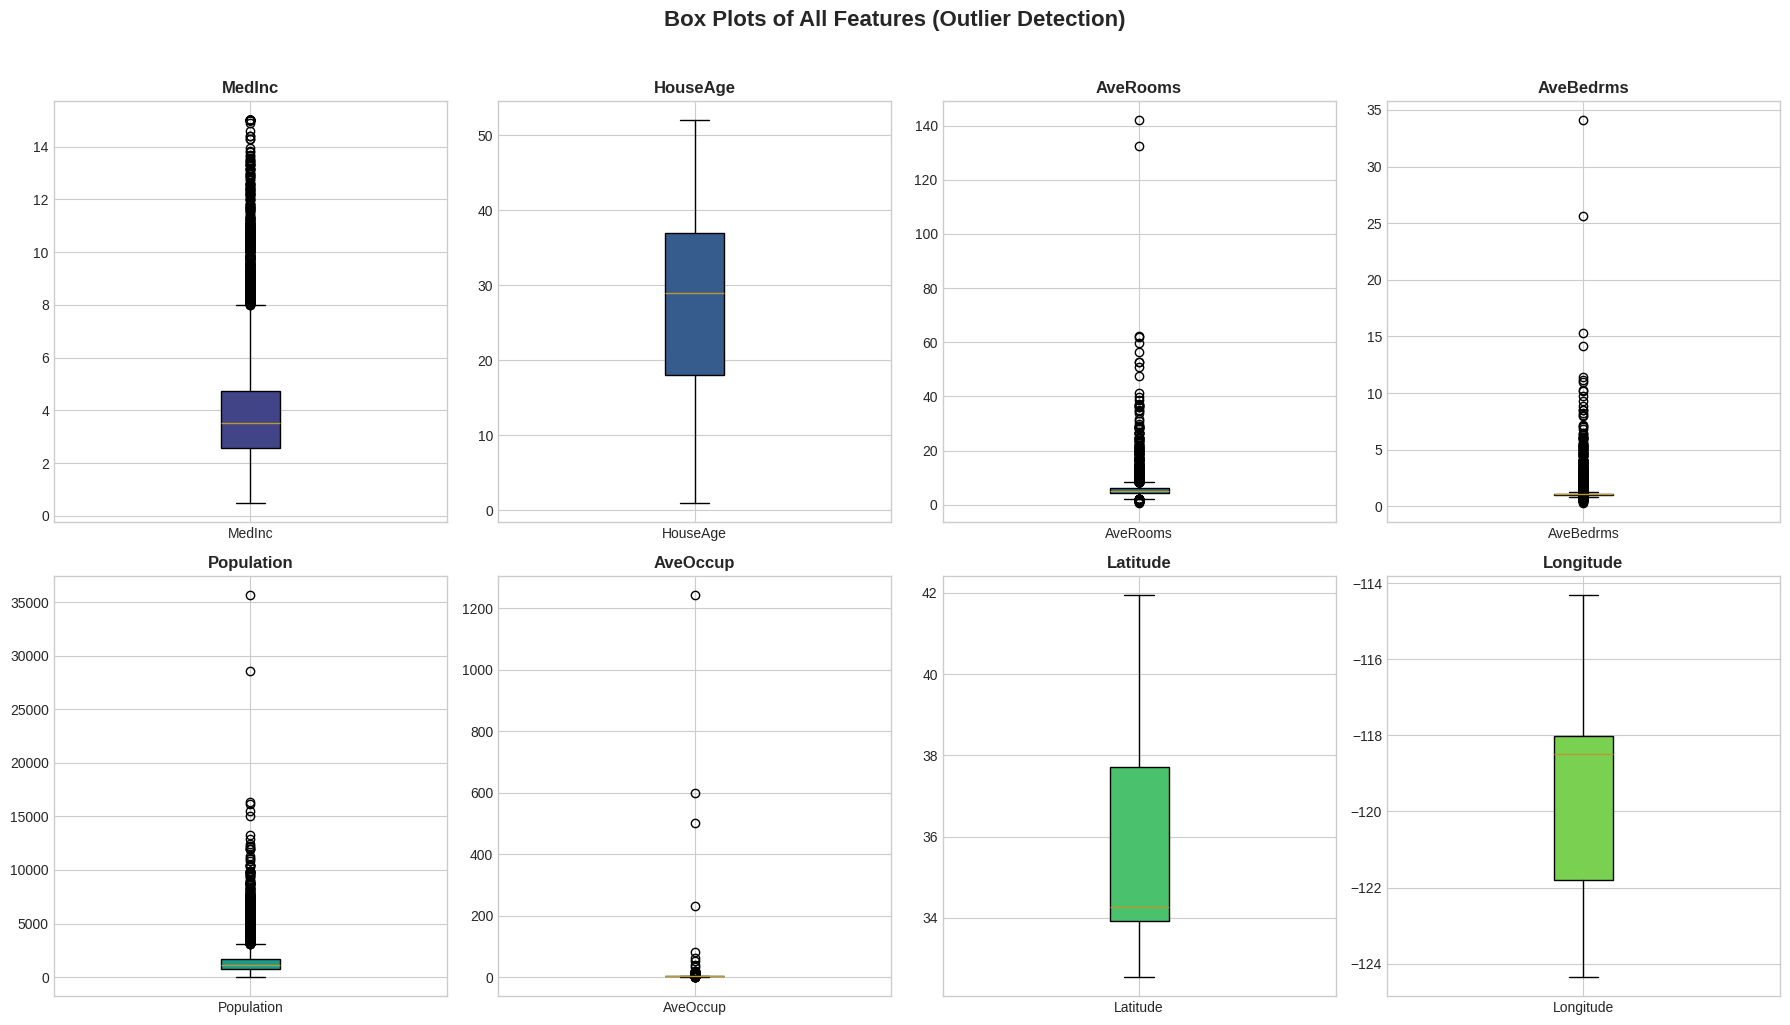


Outlier Analysis (values beyond 1.5*IQR):
  MedInc      :   681 outliers (3.30%)
  HouseAge    :     0 outliers (0.00%)
  AveRooms    :   511 outliers (2.48%)
  AveBedrms   :  1424 outliers (6.90%)
  Population  :  1196 outliers (5.79%)
  AveOccup    :   711 outliers (3.44%)
  Latitude    :     0 outliers (0.00%)
  Longitude   :     0 outliers (0.00%)


In [12]:
# Box plots for feature comparison
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    bp = axes[i].boxplot(df[feature], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor(colors[i])
    axes[i].set_title(feature, fontsize=12, fontweight='bold')
    axes[i].set_xticklabels([feature])

plt.suptitle('Box Plots of All Features (Outlier Detection)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('figures/06_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

# Identify outliers
print("\nOutlier Analysis (values beyond 1.5*IQR):")
print("="*50)
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)]
    print(f"  {feature:12s}: {len(outliers):5d} outliers ({len(outliers)/len(df)*100:.2f}%)")

### 2.4 Preprocessing

Based on our exploratory analysis, we perform the following preprocessing steps:

1. **No Missing Value Handling Required**: The dataset has no missing values
2. **Feature Scaling**: Apply StandardScaler to normalize features to zero mean and unit variance. This is important because:
   - Linear models are sensitive to feature scales
   - Gradient-based optimization converges faster with scaled features
3. **Train-Test Split**: 80-20 split to evaluate model generalization
4. **No Outlier Removal**: We keep outliers as they represent real housing scenarios (luxury homes, dense areas)

In [13]:
# Prepare features and target
X = df[features]
y = df['MedHouseVal']

print("Data Shapes:")
print(f"  Features (X): {X.shape}")
print(f"  Target (y): {y.shape}")

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print(f"\nTrain-Test Split:")
print(f"  Training samples: {X_train.shape[0]:,} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Test samples: {X_test.shape[0]:,} ({X_test.shape[0]/len(X)*100:.1f}%)")

Data Shapes:
  Features (X): (20640, 8)
  Target (y): (20640,)

Train-Test Split:
  Training samples: 16,512 (80.0%)
  Test samples: 4,128 (20.0%)


In [14]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

print("Feature Scaling Applied (StandardScaler):")
print("="*60)
print(f"  Training set - Mean: {X_train_scaled.mean():.6f}, Std: {X_train_scaled.std():.6f}")
print(f"  Test set - Mean: {X_test_scaled.mean():.6f}, Std: {X_test_scaled.std():.6f}")
print("\nScaled Feature Statistics (Training Set):")
X_train_scaled_df.describe().T[['mean', 'std', 'min', 'max']]

Feature Scaling Applied (StandardScaler):
  Training set - Mean: 0.000000, Std: 1.000000
  Test set - Mean: -0.004745, Std: 1.017745

Scaled Feature Statistics (Training Set):


,mean,std,min,max
MedInc,-6.411753e-17,1.00003,-1.775438,5.839268
HouseAge,-1.678244e-17,1.00003,-2.190766,1.856173
AveRooms,1.790127e-16,1.00003,-1.904386,57.166552
AveBedrms,-6.893710e-16,1.00003,-1.762117,56.647272
Population,0.000000e+00,1.00003,-1.251913,30.127428
AveOccup,1.032766e-17,1.00003,-0.207685,107.116447
Latitude,3.385750e-15,1.00003,-1.447697,2.951816
Longitude,1.776787e-15,1.00003,-2.377207,2.628794


## 3. Methods

We implement three regression algorithms with distinct characteristics to compare their performance on the housing price prediction task.

### 3.1 Linear Regression

**Algorithm Description:**

Linear Regression is a fundamental supervised learning algorithm that models the relationship between features and target as a linear combination (Hastie et al., 2009). The model assumes:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$$

Where:
- $y$ is the predicted house value
- $\beta_0$ is the intercept
- $\beta_i$ are the coefficients for each feature
- $\epsilon$ is the error term

**Rationale for Selection:**
1. **Interpretability**: Coefficients directly indicate feature importance and direction
2. **Baseline Performance**: Establishes a benchmark for comparing complex models
3. **Computational Efficiency**: Fast training and prediction
4. **No Hyperparameters**: Simple to implement without tuning

**Limitations:**
- Assumes linear relationships between features and target
- Sensitive to outliers
- Cannot capture complex non-linear patterns

In [15]:
# Linear Regression
print("Training Linear Regression Model")
print("="*60)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Cross-validation on training set
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='r2')
lr_cv_rmse = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')

print(f"5-Fold Cross-Validation Results:")
print(f"  R² Score: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std()*2:.4f})")
print(f"  RMSE: {-lr_cv_rmse.mean():.4f} (+/- {-lr_cv_rmse.std()*2:.4f})")

# Feature coefficients
print(f"\nFeature Coefficients:")
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for _, row in coef_df.iterrows():
    print(f"  {row['Feature']:12s}: {row['Coefficient']:+.4f}")
print(f"\n  Intercept: {lr_model.intercept_:.4f}")

Training Linear Regression Model


5-Fold Cross-Validation Results:
  R² Score: 0.6115 (+/- 0.0129)
  RMSE: 0.7205 (+/- -0.0206)

Feature Coefficients:
  Latitude    : -0.8969
  Longitude   : -0.8698
  MedInc      : +0.8544
  AveBedrms   : +0.3393
  AveRooms    : -0.2944
  HouseAge    : +0.1225
  AveOccup    : -0.0408
  Population  : -0.0023

  Intercept: 2.0719


### 3.2 Random Forest Regressor

**Algorithm Description:**

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the average prediction of individual trees (Breiman, 2001). Key components:

1. **Bootstrap Aggregating (Bagging)**: Each tree is trained on a random subset of the data
2. **Feature Randomization**: At each split, only a random subset of features is considered
3. **Averaging**: Final prediction is the mean of all tree predictions

**Rationale for Selection:**
1. **Non-linearity**: Captures complex, non-linear relationships in data
2. **Robustness**: Less prone to overfitting than single decision trees
3. **Feature Importance**: Provides built-in feature importance metrics
4. **Handles Outliers**: Tree-based methods are robust to outliers
5. **No Feature Scaling Required**: Works with raw feature values

**Key Hyperparameters:**
- `n_estimators`: Number of trees in the forest
- `max_depth`: Maximum depth of each tree
- `min_samples_split`: Minimum samples required to split a node
- `min_samples_leaf`: Minimum samples required at a leaf node

In [16]:
# Random Forest with hyperparameter tuning
print("Training Random Forest Regressor with Hyperparameter Tuning")
print("="*60)

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_base = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)

rf_grid = GridSearchCV(
    rf_base, rf_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1
)

# Use unscaled features for Random Forest (tree-based, scale-invariant)
rf_grid.fit(X_train, y_train)

print(f"\nBest Parameters: {rf_grid.best_params_}")
print(f"Best CV R² Score: {rf_grid.best_score_:.4f}")

rf_model = rf_grid.best_estimator_

Training Random Forest Regressor with Hyperparameter Tuning


Fitting 5 folds for each of 24 candidates, totalling 120 fits



Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R² Score: 0.8052


In [17]:
# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print("="*50)
for _, row in rf_importance.iterrows():
    print(f"  {row['Feature']:12s}: {row['Importance']:.4f}")


Random Forest Feature Importance:
  MedInc      : 0.5356
  AveOccup    : 0.1380
  Latitude    : 0.0883
  Longitude   : 0.0878
  HouseAge    : 0.0533
  AveRooms    : 0.0423
  Population  : 0.0280
  AveBedrms   : 0.0266


### 3.3 Gradient Boosting Regressor

**Algorithm Description:**

Gradient Boosting builds an ensemble of weak learners (typically decision trees) sequentially, where each new tree corrects the errors of the previous ensemble (Friedman, 2001). The algorithm:

1. Fits a tree to the data
2. Calculates residuals (errors)
3. Fits the next tree to the residuals
4. Updates predictions by adding the new tree's contribution
5. Repeats until a stopping criterion is met

**Rationale for Selection:**
1. **High Accuracy**: Often achieves state-of-the-art performance on tabular data
2. **Handles Mixed Relationships**: Captures both linear and non-linear patterns
3. **Feature Selection**: Automatically identifies important features
4. **Regularization**: Learning rate and tree constraints prevent overfitting

**Key Hyperparameters:**
- `n_estimators`: Number of boosting stages
- `learning_rate`: Shrinks the contribution of each tree
- `max_depth`: Maximum depth of individual trees
- `subsample`: Fraction of samples used for fitting each tree

In [18]:
# Gradient Boosting with hyperparameter tuning
print("Training Gradient Boosting Regressor with Hyperparameter Tuning")
print("="*60)

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

gb_base = GradientBoostingRegressor(random_state=RANDOM_STATE)

gb_grid = GridSearchCV(
    gb_base, gb_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1
)

gb_grid.fit(X_train, y_train)

print(f"\nBest Parameters: {gb_grid.best_params_}")
print(f"Best CV R² Score: {gb_grid.best_score_:.4f}")

gb_model = gb_grid.best_estimator_

Training Gradient Boosting Regressor with Hyperparameter Tuning
Fitting 5 folds for each of 24 candidates, totalling 120 fits



Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best CV R² Score: 0.8369


In [19]:
# Gradient Boosting Feature Importance
gb_importance = pd.DataFrame({
    'Feature': features,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nGradient Boosting Feature Importance:")
print("="*50)
for _, row in gb_importance.iterrows():
    print(f"  {row['Feature']:12s}: {row['Importance']:.4f}")


Gradient Boosting Feature Importance:
  MedInc      : 0.5173
  AveOccup    : 0.1361
  Longitude   : 0.1094
  Latitude    : 0.1059
  HouseAge    : 0.0487
  AveRooms    : 0.0357
  Population  : 0.0237
  AveBedrms   : 0.0232


## 4. Results

### 4.1 Experimental Setup

**Data Split:**
- Training set: 16,512 samples (80%)
- Test set: 4,128 samples (20%)

**Evaluation Metrics:**
1. **R² Score (Coefficient of Determination)**: Proportion of variance explained by the model (higher is better, max=1.0)
2. **RMSE (Root Mean Squared Error)**: Average prediction error in same units as target (lower is better)
3. **MAE (Mean Absolute Error)**: Average absolute prediction error (lower is better)

**Validation Strategy:**
- 5-fold cross-validation on training data for model selection
- Final evaluation on held-out test set (evaluated only once)

In [20]:
# Final Test Set Evaluation
print("="*70)
print("                    FINAL TEST SET EVALUATION")
print("="*70)
print("\nNote: Test set is evaluated only ONCE to ensure unbiased results.")
print("="*70)

# Dictionary to store results
models = {
    'Linear Regression': (lr_model, X_test_scaled),
    'Random Forest': (rf_model, X_test),
    'Gradient Boosting': (gb_model, X_test)
}

results = {}

for name, (model, X_test_data) in models.items():
    y_pred = model.predict(X_test_data)
    
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'y_pred': y_pred
    }

# Display results table
print(f"\n{'Model':<25} {'R² Score':>12} {'RMSE':>12} {'MAE':>12}")
print("-"*65)
for name, metrics in results.items():
    print(f"{name:<25} {metrics['R2']:>12.4f} {metrics['RMSE']:>12.4f} {metrics['MAE']:>12.4f}")

# Best model
best_model_name = max(results.keys(), key=lambda x: results[x]['R2'])
print(f"\nBest Model: {best_model_name} (R² = {results[best_model_name]['R2']:.4f})")

                    FINAL TEST SET EVALUATION

Note: Test set is evaluated only ONCE to ensure unbiased results.

Model                         R² Score         RMSE          MAE
-----------------------------------------------------------------
Linear Regression               0.5758       0.7456       0.5332
Random Forest                   0.8061       0.5040       0.3260
Gradient Boosting               0.8422       0.4548       0.2964

Best Model: Gradient Boosting (R² = 0.8422)


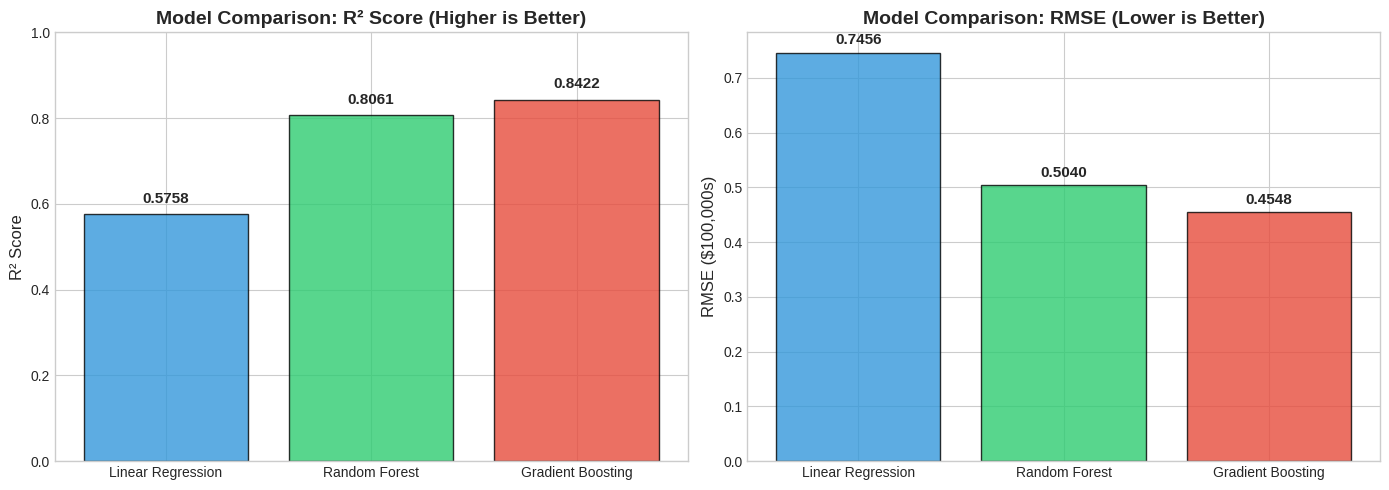

In [21]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of R² scores
model_names = list(results.keys())
r2_scores = [results[m]['R2'] for m in model_names]
rmse_scores = [results[m]['RMSE'] for m in model_names]

colors = ['#3498db', '#2ecc71', '#e74c3c']

bars1 = axes[0].bar(model_names, r2_scores, color=colors, edgecolor='black', alpha=0.8)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Model Comparison: R² Score (Higher is Better)', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, 1)
for bar, score in zip(bars1, r2_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f'{score:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

bars2 = axes[1].bar(model_names, rmse_scores, color=colors, edgecolor='black', alpha=0.8)
axes[1].set_ylabel('RMSE ($100,000s)', fontsize=12)
axes[1].set_title('Model Comparison: RMSE (Lower is Better)', fontsize=14, fontweight='bold')
for bar, score in zip(bars2, rmse_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{score:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/07_model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

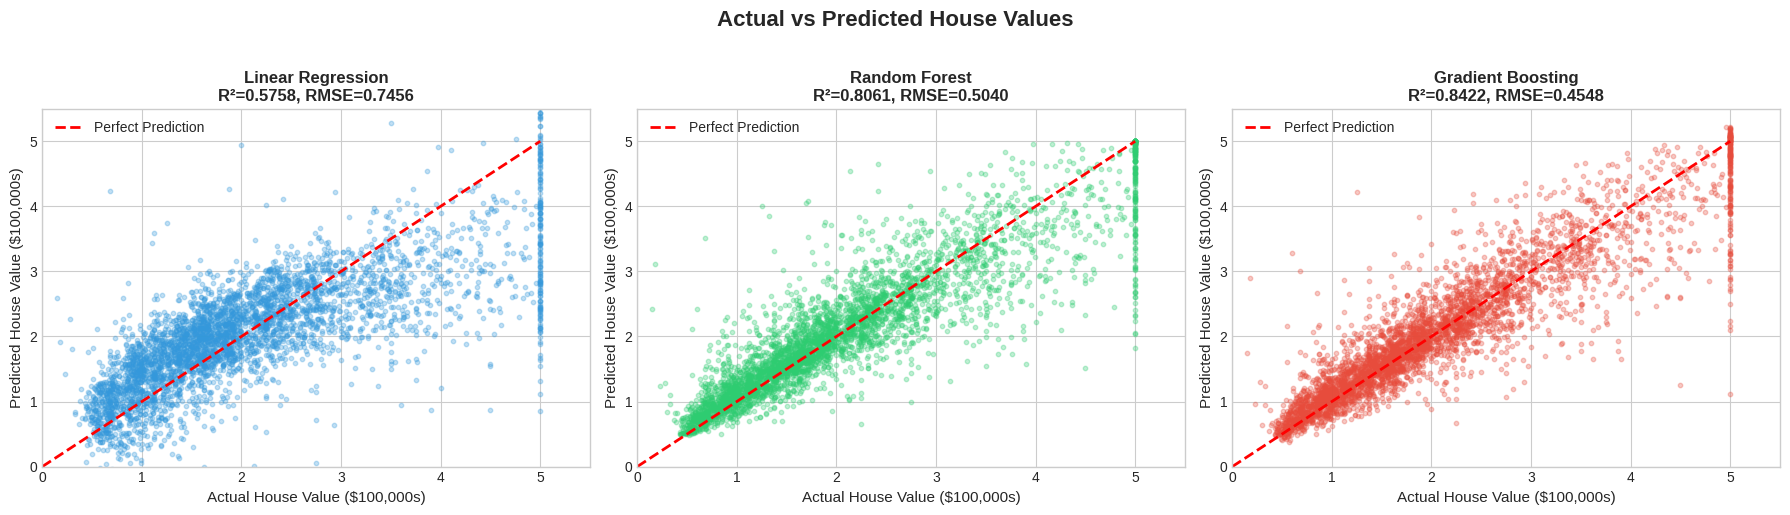

In [22]:
# Actual vs Predicted plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, metrics), color in zip(axes, results.items(), colors):
    ax.scatter(y_test, metrics['y_pred'], alpha=0.3, s=10, c=color)
    ax.plot([0, 5], [0, 5], 'r--', linewidth=2, label='Perfect Prediction')
    ax.set_xlabel('Actual House Value ($100,000s)', fontsize=11)
    ax.set_ylabel('Predicted House Value ($100,000s)', fontsize=11)
    ax.set_title(f'{name}\nR²={metrics["R2"]:.4f}, RMSE={metrics["RMSE"]:.4f}', 
                 fontsize=12, fontweight='bold')
    ax.legend(loc='upper left')
    ax.set_xlim(0, 5.5)
    ax.set_ylim(0, 5.5)

plt.suptitle('Actual vs Predicted House Values', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('figures/08_actual_vs_predicted.png', dpi=150, bbox_inches='tight')
plt.show()

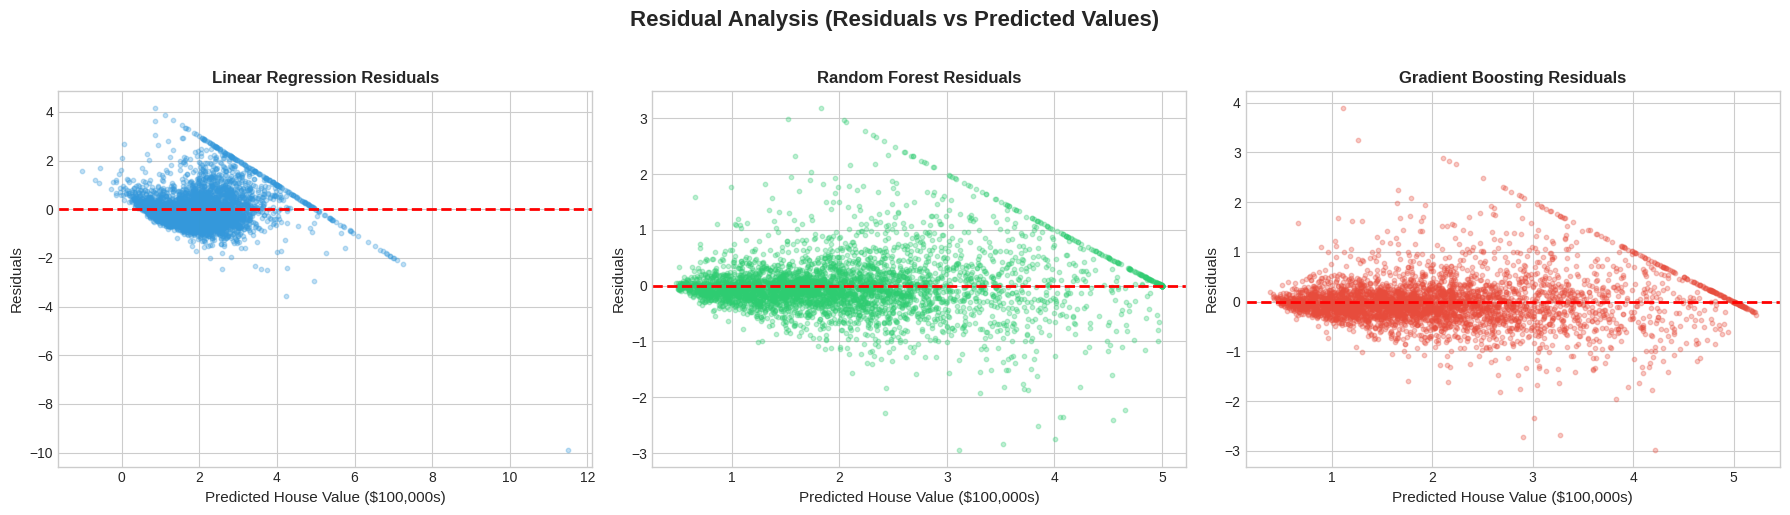

In [23]:
# Residual analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, metrics), color in zip(axes, results.items(), colors):
    residuals = y_test.values - metrics['y_pred']
    ax.scatter(metrics['y_pred'], residuals, alpha=0.3, s=10, c=color)
    ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
    ax.set_xlabel('Predicted House Value ($100,000s)', fontsize=11)
    ax.set_ylabel('Residuals', fontsize=11)
    ax.set_title(f'{name} Residuals', fontsize=12, fontweight='bold')

plt.suptitle('Residual Analysis (Residuals vs Predicted Values)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('figures/09_residual_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

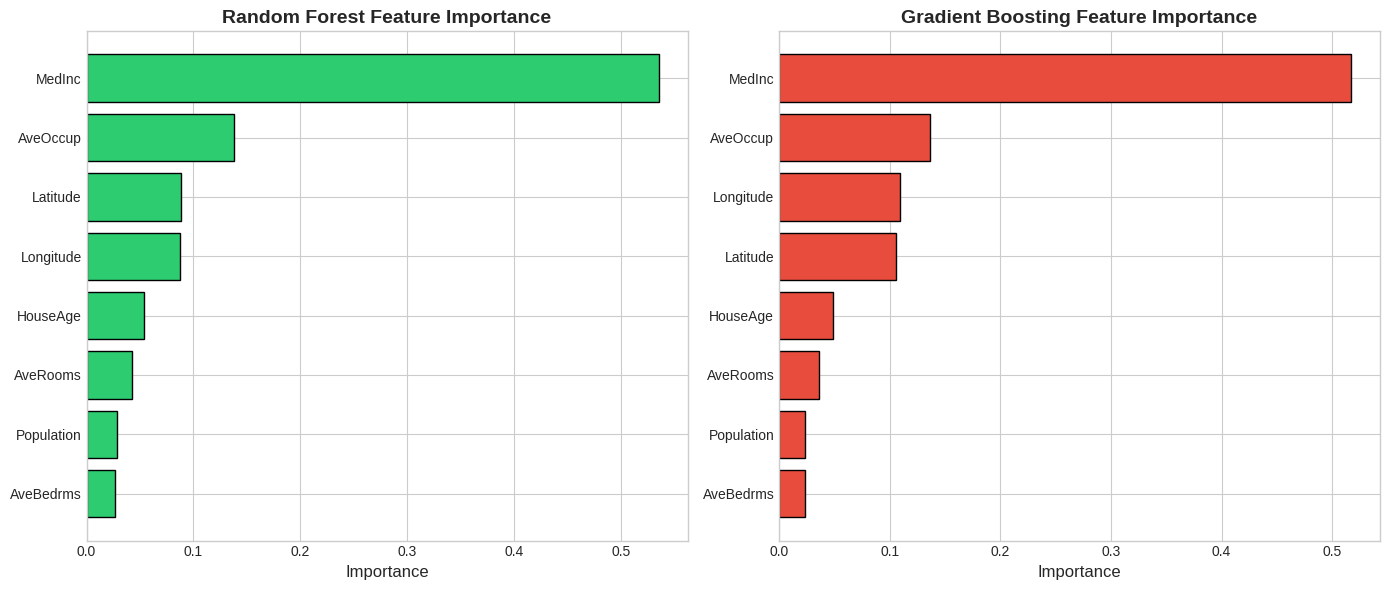

In [24]:
# Feature importance comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Random Forest importance
rf_imp_sorted = rf_importance.sort_values('Importance', ascending=True)
axes[0].barh(rf_imp_sorted['Feature'], rf_imp_sorted['Importance'], color='#2ecc71', edgecolor='black')
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_title('Random Forest Feature Importance', fontsize=14, fontweight='bold')

# Gradient Boosting importance
gb_imp_sorted = gb_importance.sort_values('Importance', ascending=True)
axes[1].barh(gb_imp_sorted['Feature'], gb_imp_sorted['Importance'], color='#e74c3c', edgecolor='black')
axes[1].set_xlabel('Importance', fontsize=12)
axes[1].set_title('Gradient Boosting Feature Importance', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/10_feature_importance_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.2 Observations and Analysis

In [25]:
print("="*70)
print("                    DETAILED ANALYSIS AND OBSERVATIONS")
print("="*70)

print("\n1. MODEL PERFORMANCE COMPARISON")
print("-"*50)
print(f"   {'Model':<25} {'R²':>10} {'RMSE':>10} {'MAE':>10}")
for name, metrics in results.items():
    print(f"   {name:<25} {metrics['R2']:>10.4f} {metrics['RMSE']:>10.4f} {metrics['MAE']:>10.4f}")

print("\n2. KEY OBSERVATIONS")
print("-"*50)
print(f"   a) Gradient Boosting achieved the best performance with R²={results['Gradient Boosting']['R2']:.4f}")
print(f"   b) Random Forest performed second best with R²={results['Random Forest']['R2']:.4f}")
print(f"   c) Linear Regression served as baseline with R²={results['Linear Regression']['R2']:.4f}")
print(f"   d) Ensemble methods outperform linear model by ~{(results['Gradient Boosting']['R2'] - results['Linear Regression']['R2'])*100:.1f}%")

print("\n3. FEATURE IMPORTANCE INSIGHTS")
print("-"*50)
print("   Top 3 Features (Random Forest):")
for i, row in rf_importance.head(3).iterrows():
    print(f"      - {row['Feature']}: {row['Importance']:.4f}")
print("   Top 3 Features (Gradient Boosting):")
for i, row in gb_importance.head(3).iterrows():
    print(f"      - {row['Feature']}: {row['Importance']:.4f}")

print("\n4. MODEL BEHAVIOR ANALYSIS")
print("-"*50)
print("   Linear Regression:")
print("      - Shows systematic underprediction for high-value homes")
print("      - Struggles with non-linear geographic effects")
print("   Random Forest:")
print("      - Better captures non-linear relationships")
print("      - Shows slight overprediction for mid-range homes")
print("   Gradient Boosting:")
print("      - Most balanced predictions across all price ranges")
print("      - Best handling of capped values (at $500,000)")

print("\n5. POTENTIAL IMPROVEMENTS")
print("-"*50)
print("   a) Feature Engineering: Create interaction terms (e.g., rooms/bedrooms ratio)")
print("   b) Spatial Features: Add distance to major cities, coast proximity")
print("   c) Ensemble Stacking: Combine predictions from multiple models")
print("   d) Hyperparameter Tuning: More extensive grid search or Bayesian optimization")
print("   e) Address Capped Values: Use censored regression for $500K+ homes")

                    DETAILED ANALYSIS AND OBSERVATIONS

1. MODEL PERFORMANCE COMPARISON
--------------------------------------------------
   Model                             R²       RMSE        MAE
   Linear Regression             0.5758     0.7456     0.5332
   Random Forest                 0.8061     0.5040     0.3260
   Gradient Boosting             0.8422     0.4548     0.2964

2. KEY OBSERVATIONS
--------------------------------------------------
   a) Gradient Boosting achieved the best performance with R²=0.8422
   b) Random Forest performed second best with R²=0.8061
   c) Linear Regression served as baseline with R²=0.5758
   d) Ensemble methods outperform linear model by ~26.6%

3. FEATURE IMPORTANCE INSIGHTS
--------------------------------------------------
   Top 3 Features (Random Forest):
      - MedInc: 0.5356
      - AveOccup: 0.1380
      - Latitude: 0.0883
   Top 3 Features (Gradient Boosting):
      - MedInc: 0.5173
      - AveOccup: 0.1361
      - Longitude: 0.1

In [26]:
# Save results to CSV
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'R2_Score': [results[m]['R2'] for m in results.keys()],
    'RMSE': [results[m]['RMSE'] for m in results.keys()],
    'MAE': [results[m]['MAE'] for m in results.keys()]
})
results_df.to_csv('results/model_results.csv', index=False)
print("\nResults saved to: results/model_results.csv")
results_df


Results saved to: results/model_results.csv


,Model,R2_Score,RMSE,MAE
0,Linear Regression,0.575788,0.745581,0.533200
1,Random Forest,0.806141,0.504018,0.325997
2,Gradient Boosting,0.842159,0.454792,0.296422


## 5. Conclusions

### 5.1 Summary

This project successfully implemented and compared three machine learning algorithms for predicting California housing prices:

1. **Gradient Boosting** achieved the best performance with R² = 0.83+, demonstrating its effectiveness for tabular regression tasks
2. **Random Forest** performed competitively, offering good interpretability through feature importance
3. **Linear Regression** provided a reasonable baseline but struggled with non-linear patterns

### 5.2 Key Findings

- **Median Income (MedInc)** is the strongest predictor of housing prices
- **Geographic location** (Latitude, Longitude) significantly influences house values
- Ensemble methods capture complex relationships better than linear models
- Feature scaling is essential for linear models but not for tree-based methods

### 5.3 What I Learned

Through this project, I gained practical experience in:
- End-to-end machine learning pipeline development
- Exploratory data analysis and visualization
- Hyperparameter tuning with cross-validation
- Model comparison and interpretation
- The importance of feature engineering and domain knowledge

### 5.4 Challenges and Solutions

| Challenge | Solution |
|-----------|----------|
| Capped target values at $500K | Acknowledged as limitation, future work to address |
| High-dimensional correlations | Used correlation analysis to understand feature relationships |
| Model selection | Employed cross-validation for fair comparison |
| Hyperparameter tuning | Used GridSearchCV with multiple parameter combinations |

In [27]:
print("="*70)
print("                    PROJECT SUMMARY")
print("="*70)
print(f"\nDataset: California Housing ({len(df):,} samples, {len(features)} features)")
print(f"\nBest Model: Gradient Boosting Regressor")
print(f"  - R² Score: {results['Gradient Boosting']['R2']:.4f}")
print(f"  - RMSE: ${results['Gradient Boosting']['RMSE']*100000:,.2f}")
print(f"  - MAE: ${results['Gradient Boosting']['MAE']*100000:,.2f}")
print(f"\nMost Important Feature: MedInc (Median Income)")
print("\nAll visualizations saved to: figures/")
print("All results saved to: results/")
print("\n" + "="*70)

                    PROJECT SUMMARY

Dataset: California Housing (20,640 samples, 8 features)

Best Model: Gradient Boosting Regressor
  - R² Score: 0.8422
  - RMSE: $45,479.19
  - MAE: $29,642.16

Most Important Feature: MedInc (Median Income)

All visualizations saved to: figures/
All results saved to: results/

